3. Exercício sobre Early stopping. Dada a seguinte versão ruidosa da função objetivo y_noisy = 2 + x + 0.5*x^2 + x^3 + n, onde x é um vetor coluna com M = 100 elementos
retirados de uma distribuição aleatória uniformemente distribuída variando entre -3 e 3 e n é o vetor ruído com M elementos retirados de uma distribuição aleatória Gaussiana
com média 0 e variância unitária. Utilize um polinômio de ordem 30 como função hipótese, padronização de atributos (ou seja, remoção da média e divisão pelo desvio
padrão) e o algoritmo do gradiente descendente em batelada. Utilizando a função “ train_test_split ”, divida os exemplos em um conjunto de treinamento e outro de
validação com proporção 70% e 30%, respectivamente. Faça o seguinte
a. Plote um gráfico mostrando a função objetivo e sua versão ruidosa.
b. Encontre, manualmente, o melhor valor para o passo de aprendizagem.
c. Execute o treinamento por 1000 épocas.
d. Para cada época, armazene em um vetor os valores do erro de treinamento e validação.
e. Para cada época, verifique se o valor do erro de validação atual é menor do que o erro de validação mínimo. Se sim, armazene o modelo utilizado para aquela época, ou seja, os valores dos pesos, e o valor do erro de validação para aquela
época. ( Dica : inicialize a variável contendo o erro de validação mínimo como: minimum_val_error = float("inf") ).
f. Plote um gráfico mostrando os erros de treinamento e validação versus o número de épocas.
g. Dado que você armazenou o modelo que obteve o menor erro de validação, utilize-o para criar um gráfico que mostre a função hipótese (ou seja, o
mapeamento do atributos de entrada, x, nos valores de saída, y, através do modelo treinado) e a função objetivo e sua versão ruidosa.

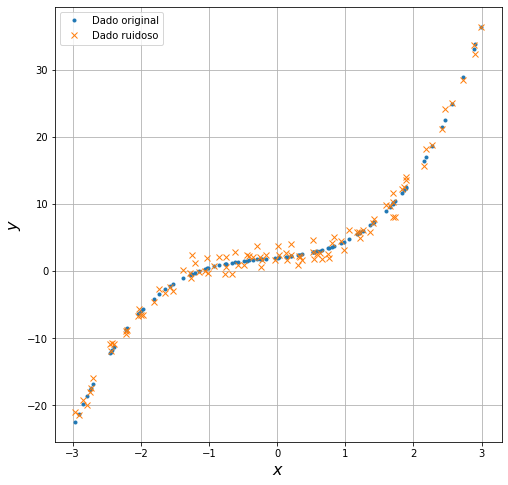

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


# Define the order of the hyphothesis polinomial.
model_order = 30 #ordem 30

# learning rate.
alpha = 0.2

# Maximum number of iterations.
n_epochs = 1000

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(32)

def target_function(M, x):
    y = 2 + x + 0.5*x**2 + x**3
    return y

# Create target training function and its noisy version.
M = 100 # define the number of examples.
x = 6*np.random.rand(M, 1) - 3
y = target_function(M, x)
y_noisy = y + np.random.randn(M, 1)

# Create target test function and its noisy version.
Mtest = 100
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1)
y_test = target_function(Mtest, x_test) + np.random.randn(Mtest, 1)

# Plot original data versus noisy version.
fig = plt.figure(figsize=(8,8))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [3]:
def mse(X, a, y, M):
    Jgd = (1/M)*sum(np.power((y - X.dot(a)), 2))
    return Jgd

def bgd(X_train, y_train, X_val, y_val, X_test, y_test, model_order, alpha, n_epochs, a_init):
    
    minimum_val_error = float("inf")
    best_epoch = None
    best_model = None
    norm_hist = np.zeros(n_epochs+1)
    
    # Random initialization of parameters.
    a = a_init

    # Create array for storing error values.
    Jgd_train = np.zeros(n_epochs+1)
    Jgd_val   = np.zeros(n_epochs+1)
    Jgd_test  = np.zeros(n_epochs+1)

    Jgd_train[0] = mse(X_train, a, y_train, len(y_train))
    
    Jgd_val[0]   = mse(X_val, a, y_val, len(y_val))
    
    Jgd_test[0]  = mse(X_test, a, y_test, len(y_test))
    
    norm_hist[0] = np.linalg.norm(a)
    
    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    #while iteration < n_epochs and error > 0.001:
    while iteration < n_epochs:
        gradients = -2/len(y_train)*X_train.T.dot(y_train - X_train.dot(a))
        a = a - alpha * gradients
        Jgd_train[iteration+1] = mse(X_train, a, y_train, len(y_train))
        error = np.abs(Jgd_train[iteration+1] - Jgd_train[iteration])
        Jgd_val[iteration+1] = mse(X_val, a, y_val, len(y_val))
        Jgd_test[iteration+1] = mse(X_test, a, y_test, len(y_test))
        norm_hist[iteration+1] = np.linalg.norm(a[1:])
        if Jgd_val[iteration+1] < minimum_val_error:
            minimum_val_error = Jgd_val[iteration+1]
            best_epoch = iteration
            best_model = a
        
        iteration = iteration + 1
        
    return Jgd_train, Jgd_val, Jgd_test, minimum_val_error, best_epoch, best_model, norm_hist, a

# Split set.
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=42)

# Concatenate both column vectors for training set.
X_train = np.ones((len(y_train),1))
for i in range(1, model_order+1):
    X_train = np.c_[X_train, np.power(x_train, i)]

# Run feature-scaling.
scaler = StandardScaler()
X_train = np.c_[np.ones((len(y_train),1)), scaler.fit_transform(X_train[:,1:])]

# Concatenate both column vectors for validation set.
X_val = np.ones((len(y_val),1))
for i in range(1, model_order+1):
    X_val = np.c_[X_val, np.power(x_val, i)]

# Run feature-scaling.
X_val = np.c_[np.ones((len(y_val),1)), scaler.transform(X_val[:,1:])]

# Concatenate both column vectors for test set.
X_test = np.ones((len(y_test),1))
for i in range(1, model_order+1):
    X_test = np.c_[X_test, np.power(x_test, i)]

# Run feature-scaling.
X_test = np.c_[np.ones((len(y_test),1)), scaler.transform(X_test[:,1:])]

# Initialize weights.
a_init = np.random.randn(model_order+1, 1)
if(0):
    a_init = np.zeros((model_order+1, 1))
    a_init[0] = 2
    a_init[1] = 1
    a_init[2] = 0.5
    a_init[3] = 1

# Run batch gradient descent.
Jgd_train, Jgd_val, Jgd_test, minimum_val_error, best_epoch, best_model, norm_hist, a = bgd(X_train, y_train, X_val, y_val, X_test, y_test, model_order, alpha, n_epochs, a_init)

a_opt = [1, 0.5, 1]
print('Melhor época:',best_epoch)
print('Erro de validação mínima:',minimum_val_error)
print('norma:', np.linalg.norm(best_model[1:])/30)
print('norma:', np.linalg.norm(a_opt)/3)

best_epoch: 660
minimum_val_error: 1.9353268534923633
norma: 0.2496409428624178
norma: 0.5


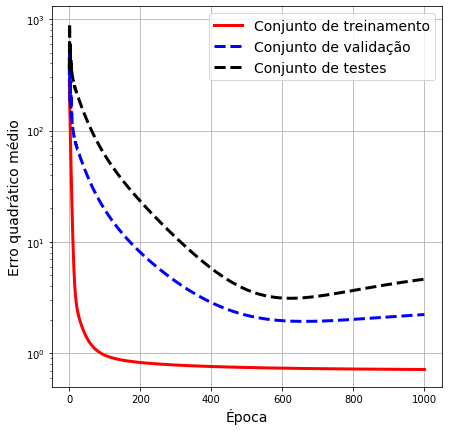

In [4]:
fig = plt.figure(figsize=(7,7))

plt.plot(range(0, n_epochs+1), Jgd_train, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(range(0, n_epochs+1), Jgd_val, "b--", linewidth=3, label="Conjunto de validação")
plt.plot(range(0, n_epochs+1), Jgd_test, "k--", linewidth=3, label="Conjunto de testes")
plt.yscale('log')
plt.legend(loc="upper right", fontsize=14)
plt.xlabel('Época', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

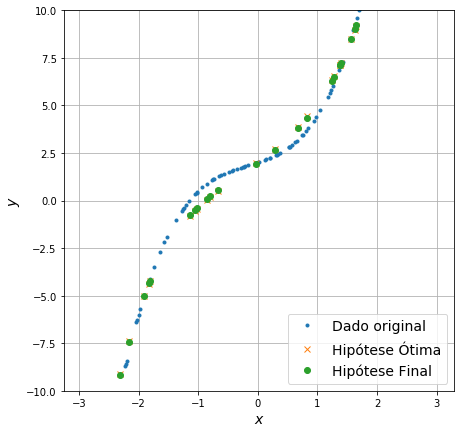

In [20]:
fig = plt.figure(figsize=(7,7))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x_train, X_train.dot(best_model), 'x', label='Hipótese Ótima')
plt.plot(x_train, X_train.dot(a), 'o', label='Hipótese Final')
plt.ylim([-10, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [6]:
# Print coeficientes
print(best_model)

[[ 0.57551785]
 [ 4.03599287]
 [ 0.9149178 ]
 [ 3.75620507]
 [-0.58095657]
 [ 3.30164547]
 [ 0.91446715]
 [ 0.47211136]
 [ 1.64358381]
 [-0.80547062]
 [-0.5352462 ]
 [ 1.36101612]
 [-0.07076564]
 [-0.12004841]
 [-0.56914866]
 [-0.19852633]
 [-0.97436247]
 [ 0.97555076]
 [-0.05069134]
 [-0.70821241]
 [ 0.47874658]
 [ 0.17094297]
 [ 0.39179217]
 [ 0.38828414]
 [-1.23693116]
 [-0.89295913]
 [ 0.36464301]
 [ 0.1980609 ]
 [-0.36808146]
 [-0.36383801]
 [ 0.97393067]]


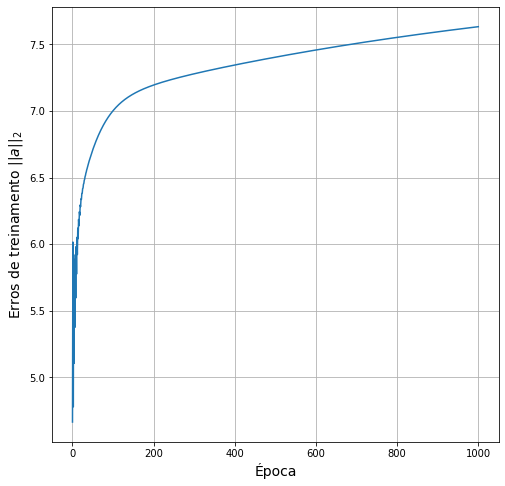

In [24]:
fig = plt.figure(figsize=(8,8))
plt.plot(norm_hist)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Erros de treinamento $||a||_2$', fontsize=14)
plt.grid()
plt.show()